# 1. Prepare DSA's Framework


In [1]:
%%shell

#for instructor:
FRAMEWORK_LOCATION=""
DSAFRAMEWORK="dsaframework"

#######################################################################################################
### STUDENTS NEED TO: dsaframework
### (1) Specify STUDENT_ID
### (2) Specify your framework for DSA
### (3) RUN this cell
#######################################################################################################
#for student: https://drive.google.com/file/d/1EUqdXElaWz2qBSQIjqz64MDzJK-k7toE/view?usp=sharing
STUDENT_ID="1952041" #REPLACE "dsastudents" with your student's id
FILEID="1EUqdXElaWz2qBSQIjqz64MDzJK-k7toE" # here is the id of your framework


#######################################################################################################
### DO NOT EDIT THE FOLLOWING
#######################################################################################################
MODE="student" #options: {"instructor", "student"}
if [ $MODE == "instructor" ]
then
  cd /content
  rm -rf "$DSAFRAMEWORK" "$DSAFRAMEWORK".zip
  cp "$FRAMEWORK_LOCATION"/"$DSAFRAMEWORK".zip /content
  unzip -q "$DSAFRAMEWORK".zip
  rm -f settings.txt
  printf "DSAFRAMEWORK=$DSAFRAMEWORK\n" >> settings.txt
  echo "Preparation: Done"
fi
  
if [ $MODE == "student" ]
then
  cd /content
  DSAFRAMEWORK="$STUDENT_ID"
  rm -rf "$DSAFRAMEWORK" "$DSAFRAMEWORK".zip
  gdown -q --id $FILEID --output "$DSAFRAMEWORK".zip
  unzip -q "$DSAFRAMEWORK".zip
  rm -f settings.txt
  printf "STUDENT_ID=$STUDENT_ID\n" >> settings.txt
  printf "DSAFRAMEWORK=$DSAFRAMEWORK\n" >> settings.txt
  echo "Preparation: Done"
fi

Preparation: Done


In [3]:
################################################################################
# Change the current directory
# Steps:
# (1) REPLACE "dsaframework" with your student's id
# (2) RUN this cell
################################################################################

!echo "Current directory:"
%cd /content/1952041 
%pwd

!echo ""
!echo "Current directory's content:"
%ls -l

Current directory:
/content/1952041

Current directory's content:
total 636
drwxr-xr-x 3 root root   4096 Jun 23 16:30 doctest/
drwxr-xr-x 4 root root   4096 Jun 23 16:35 dsacpp/
-rw-r--r-- 1 root root 630664 Jul  4 08:45 dsa_main_test
-rw-r--r-- 1 root root    749 Jun 12 11:53 dsa_main_test.sh
drwxr-xr-x 4 root root   4096 Jun 23 16:30 examples/
-rw-r--r-- 1 root root   1230 Jun 12 17:03 examples.sh


# 2. Install additional libs for exercises/homeworks

In [4]:
%%shell
################################################################################
# RUN THIS CELL
################################################################################

#Install OpenCV
gdown https://github.com/opencv/opencv/archive/4.5.2.zip
rm -rf opencv-4.5.2
unzip -q 4.5.2.zip

Downloading...
From: https://github.com/opencv/opencv/archive/4.5.2.zip
To: /content/1952041/4.5.2.zip
100% 93.2M/93.2M [00:00<00:00, 130MB/s] 


# 3. Create and load data


In [39]:
%%shell
################################################################################
# RUN THIS CELL
################################################################################

rm -rf input output
mkdir input
mkdir output

cd input
gdown -q --id 1raVEB4YMutxpj3Ftt0L58qLx_E6AM5qt
gdown -q --id 1_snEE03ccBR3_DuZUeotwFMj5WmCXuqr
rm -rf filelist.csv
printf "filename\n" >> filelist.csv
printf "board1.png\n" >> filelist.csv
printf "board2.png\n" >> filelist.csv
printf "board3.png\n" >> filelist.csv
printf "thuylinh.jpeg\n" >> filelist.csv
printf "tieuvi.jpeg\n" >> filelist.csv

image shape: (751, 911, 3)


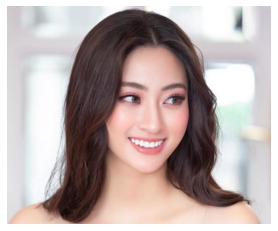

image shape: (479, 556, 3)


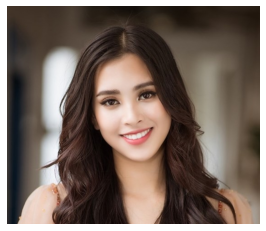

image shape: (40, 40)


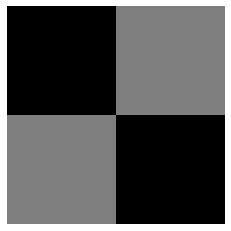

image shape: (80, 80)


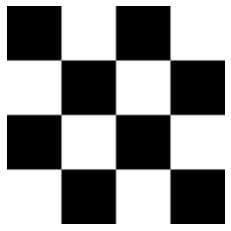

image shape: (50, 50)


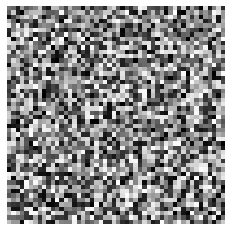

True

In [55]:
################################################################################
# RUN THIS CELL
################################################################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import cv2
np.random.seed(2021)

def checkerboard(bx=10, by=10, nbx=2, nby=2, white=255):
    zeros = np.zeros((bx,by), dtype=np.uint8)
    ones = white*np.ones((bx,by), dtype=np.uint8)
    sub1 = np.concatenate((zeros, ones), axis=1)
    sub2 = np.concatenate((ones, zeros), axis=1)
    block = np.concatenate((sub1, sub2), axis=0)
    image = np.tile(block, (nbx, nby))
    return image
def gen_image(nrows=50, ncols=50):
    image = np.random.randint(0, 255, (nrows, ncols), dtype=np.uint8)
    return image

image = cv2.cvtColor(cv2.imread('input/thuylinh.jpeg', 1), cv2.COLOR_BGR2RGB)
print('image shape:', image.shape)
plt.axis('off')
plt.imshow(image, cmap='gray', norm=NoNorm())
plt.show()

image = cv2.cvtColor(cv2.imread('input/tieuvi.jpeg', 1), cv2.COLOR_BGR2RGB)
print('image shape:', image.shape)
plt.axis('off')
plt.imshow(image, cmap='gray', norm=NoNorm())
plt.show()

image = checkerboard(bx=20, by=20, nbx=1, nby=1, white=127)
print('image shape:', image.shape)
plt.axis('off')
plt.imshow(image, cmap='gray', norm=NoNorm())
plt.show()
cv2.imwrite('input/board1.png', image)

image = checkerboard(bx=20, by=20, nbx=2, nby=2, white=255)
print('image shape:', image.shape)
plt.axis('off')
plt.imshow(image, cmap='gray', norm=NoNorm())
plt.show()
cv2.imwrite('input/board2.png', image)

image = gen_image(nrows=50, ncols=50)
print('image shape:', image.shape)
plt.axis('off')
plt.imshow(image, cmap='gray', norm=NoNorm())
plt.show()
cv2.imwrite('input/board3.png', image)

# 4. Code

In [56]:
%%writefile huffman.h

#ifndef huffman_h
#define huffman_h

#include <iostream>
#include <vector>
#include <sstream>
#include <fstream>
#include "opencv2/opencv.hpp"
#include "heap/Heap.h"
//using namespace cv;
using namespace std;

typedef unsigned char uint8;
typedef unsigned int  uint32;


template <class T>
struct Node{
    //YOUR CODE HERE
        T symbol;
        float freq;
        Node<T>*left, *right;
        Node(float freq, Node<T>* left, Node<T>* right, T symbol)
        {
            this->freq = freq;
            this->left = left;
            this->right = right;
            this->symbol = symbol;
        }
};

template<class T>
int node_comparator(Node<T>*& a, Node<T>*& b){
    //YOUR CODE HERE
     if(a->freq < b->freq)
        return -1;
    else if(a->freq > b->freq)
        return 1;
    else
        return 0;
}

template <class T>
Node<T>* build_huffman_tree(T* symbols, float* freqs, int size){
    //YOUR CODE HERE
    Heap<Node<T>*> heap(&node_comparator, Heap<Node<T>*>::free);
    for(int idx = 0 ; idx <size; idx++){
        T symbol = symbols[idx];
        float freq = freqs[idx];
        heap.push(new Node<T>(freq, NULL, NULL, symbol));
    }

    while(heap.size() > 1){
        Node<T>* left  = heap.pop();
        Node<T>* right = heap.pop();
        heap.push(new Node<T>(left->freq + right->freq, left,right, left->symbol));
    }
    return heap.pop();
}


void gen_huffman_table(Node<uint8>* root, string bits, string* map){
    //YOUR CODE HERE
    if((root->left == NULL) && (root->right==NULL))
      map[root->symbol] = bits;
    else{
        string left_path = bits;
        left_path.push_back('0');
        string right_path = bits;
        right_path.push_back('1');
        gen_huffman_table(root->right, right_path, map);
        gen_huffman_table(root->left, left_path, map);
    }
}

void demo_unit8_symbols(uint8* symbols, /*list of symbols, ex: 0, 1, 2, ...; max: 255*/
                        int size, /*num of symbols in array symbols; num of freqs*/
                        float* freqs, /*symbol frequency; computed by bincount*/
                        string* const huffman_table /*OUTPUT: huffman table*/
                        ){

    Node<uint8>* root = build_huffman_tree(symbols, freqs, size);
    gen_huffman_table(root, "", huffman_table); 
}

float averaged_nbits(string * const huffman_table, float* freqs, int size){
    //YOUR CODE HERE
    int total = 0;
    for(int i = 0; i < size; i++)
    {
        total += freqs[i];
    }
    float averageBit = 0;
    for(int i = 0; i < size; i++)
    {
        averageBit+=((freqs[i]/total)*huffman_table[i].length());
    }
    return averageBit;
}

void bincount(uint8* data, int size, float* const freq, int min, int max)
{
    //YOUR CODE HERE
    int freqSize = max-min+1;
    for (int i = 0; i < freqSize; i++)
        freq[i] = 0; 
    for (int i = 0; i < size; i++)
        freq[unsigned(data[i])]++;
}


void show_huffman_table(uint8* symbols, int size, 
                        float* const freqs,
                        string* const huffman_table){
    //YOUR CODE HERE
    float all = 0;
    for(int i = 0; i < size; i++)
    {
        all+= freqs[i];
    }     
    for(int i = 0; i < size; i++){
        cout << fixed << setw(4) << i << ":" << fixed << setw(8) << setprecision(2) << freqs[i]/all << ": " << fixed << huffman_table[i] << endl;
    }
    cout << "averaged nbits: " << fixed << setprecision(2) << averaged_nbits(huffman_table, freqs, size) << endl;
}

void write_huffman_table(uint8* symbols, int size, 
                        float* const freqs,
                        string* const huffman_table,
                        string filename){
    //YOUR CODE HERE
    //Node<uint8>* root = build_huffman_tree(symbols,freqs,size);
    //gen_huffman_table(root,"",huffman_table);
    float all = 0;
    for(int i = 0; i < size; i++)
    {
        all+= freqs[i];
    }
    std::ofstream myfile;
    myfile.open(filename);
    myfile << "symbols,freqs,bits" << '\n'; 
    for(int i = 0; i < size; i++)
    {
        myfile << (int)symbols[i] << "," << fixed << setprecision(2) << (freqs[i]/all) << "," << huffman_table[i] <<'\n';
    }
    myfile.close();
}

#endif

Overwriting huffman.h


In [44]:
%%writefile main.cpp
#include <iostream>
#include "opencv2/opencv.hpp"
#include "util/FileIOLib.h"
#include "heap/Heap.h"
#include "hash/XHashMap.h"
#include "huffman.h"
//using namespace cv;
using namespace std;

typedef unsigned char uint8;
typedef unsigned int  uint32;

/////////////////////////////////////////////////////////////////////////////////////////
// Command line parsing functions
/////////////////////////////////////////////////////////////////////////////////////////

int get_int(char** begin, char** end, const string& option, int _default){
    char** ptr = std::find(begin, end, option);
    if (ptr != end && ++ptr != end) return stoi(*ptr);
    else return _default;
}

string get_string(char** begin, char** end, const string& option, string _default){
    char** ptr = std::find(begin, end, option);
    if (ptr != end && ++ptr != end) return string(*ptr);
    else return _default;
}
bool option_exist(char** begin, char** end, const string& option){
    return std::find(begin, end, option) != end;
}

/////////////////////////////////////////////////////////////////////////////////////////
//Some demos
/////////////////////////////////////////////////////////////////////////////////////////

void demo_1(int argc, char** argv){
    cout << "DEMO 1:" << endl;
    cout << "files specified in filelist.csv" << endl;
    cout << "(you have to do Huffman coding for all files specifed in filelist.csv)" << endl;

    string input;
    string output;
    string filelist;

    input = get_string(argv, argv+argc, "-in", "input");
    output = get_string(argv, argv+argc, "-out", "output");
    filelist = get_string(argv, argv+argc, "-list", "input/filelist.csv");
    
    DataFrame master(filelist);
    vector<string> filenames = master["filename"];
    for(auto it=filenames.begin(); it != filenames.end(); it++)
      cout << *it << endl;
}

void demo_2(string input, string output){
    cout << "DEMO 2:  how to use bincount, and others"  << endl;
    cout << "(you have write huffman table with to a file with same name and extension CSV)" << endl;

    int size = 8;
    uint8 symbols[] = {0, 1, 2, 3, 4, 5, 6, 7};
    float freqs[8];

    int min=0, max=7;
    uint8 data[] = {5, 5, 0, 1, 6, \
                    7, 6, 6, 6, 2, \
                    2, 1, 1, 0, 1, \
                    7, 0, 0, 0, 0}; //20 data items;
    int nitems = 20;

    string huffman_table[size];
    //////////////////////////////////////////////

    bincount(data, nitems, freqs, min, max);
    demo_unit8_symbols(symbols, size, freqs, huffman_table);
    show_huffman_table(symbols, size, freqs, huffman_table);
    write_huffman_table(symbols, size, freqs, huffman_table, output + "/huffman_demo_1.csv");
}

void demo_3(string input, string output){
    cout << "DEMO 2:  how to use bincount, and others"  << endl;
    cout << "(you have write huffman table with to a file with same name and extension CSV)" << endl;

    string filename = input + "/board1.png";
    cv::Mat image = cv::imread(filename, cv::IMREAD_GRAYSCALE);

    if (image.empty()) cout << filename << ": not found!" << endl;
    
    //Here: valid image:
    cout << "rows: " << image.rows << endl;
    cout << "cols: " << image.cols << endl;
    cout << "channels: " << image.channels() << endl;
    cout << "number of pixels: " << image.rows* image.cols * image.channels() << endl;
    cout << endl;

    //Pointer to data in image: data
    uint8* data = image.ptr<uint8>(0, 0);
    int nitems = image.rows* image.cols * image.channels();
    
    int size = 256;
    uint8 symbols[256];
    for(int level=0; level < size; level++) symbols[level] = level;
    float freqs[256]; int min = 0, max = 255;
    string huffman_table[256];

    bincount(data, nitems, freqs, min, max);
    demo_unit8_symbols(symbols, size, freqs, huffman_table);
    show_huffman_table(symbols, size, freqs, huffman_table);
    write_huffman_table(symbols, size, freqs, huffman_table,  output + "/board1.csv");
}
void getBoard(string filename, string input, string output, string outputName)
{
    cv::Mat image = cv::imread(filename, cv::IMREAD_GRAYSCALE);

    if (image.empty()) cout << filename << ": not found!" << endl;
    
    //Here: valid image:
    cout << "rows: " << image.rows << endl;
    cout << "cols: " << image.cols << endl;
    cout << "channels: " << image.channels() << endl;
    cout << "number of pixels: " << image.rows* image.cols * image.channels() << endl;
    cout << endl;

    //Pointer to data in image: data
    uint8* data = image.ptr<uint8>(0, 0);
    int nitems = image.rows* image.cols * image.channels();
    
    int size = 256;
    uint8 symbols[256];
    for(int level=0; level < size; level++) symbols[level] = level;
    float freqs[256]; int min = 0, max = 255;
    string huffman_table[256];

    bincount(data, nitems, freqs, min, max);
    demo_unit8_symbols(symbols, size, freqs, huffman_table);
    show_huffman_table(symbols, size, freqs, huffman_table);
    write_huffman_table(symbols, size, freqs, huffman_table,  outputName);
 }

int main(int argc, char** argv){
    if(option_exist(argv, argv+argc, "-h")){
        cout << "Show help" << endl;
        return 0;
    }
    ///////////////////////////////////////////////////////////////////////////

    //YOUR CODE HERE: to generate csv files
    /*
    YOUR CODE HERE
    Guidelines:
    command line: ./main -in "input" -out "output" -list "/input/filelist.csv"
    Where, 
      > input: folder contains input images: *.png, *.jpeg
      > output: folder contains your output files (CSV)
      > filelist.csv: contains list of files will be processed with your program
      ??????FORMAT of your program output??????
      (Run the first cell in Grader section (5.) and see the samples)

    For examples:
      in input folder contains input/filelist.csv, and it contains
      board1.png 
      board2.png 

      => Your program:
      (1) read data in input/board1.png (see demo_2 above)
      (2) compute symbols frequency and huffman coding for each of symbols: 0,1,2,..., 255
      (3) write to output file (CSV) output/board1.csv: it has 3 columns as follows
        * symbols:
        * freqs: NORMALIZED  frequency (format: 6.2f)
        * bits: bit sequence coded for the corresponding symbol

      (4) Do similar things for board2.png and others in filelist.csv
    */

    //Replace the following code with your program
    
    
    string input = get_string(argv, argv+argc, "-in", "input");
    string output = get_string(argv, argv+argc, "-out", "output");


    if(option_exist(argv, argv+argc, "-b1")){
        cout << endl;
        cout << "Board1.png" << endl;
        cout << string(80, '-') << endl;

        string filename = input + "/board1.png";
        string outputName = output +"/board1.csv";
        getBoard(filename,input,output,outputName);
    }
    if(option_exist(argv, argv+argc, "-b2")){
        cout << endl;
        cout << "Board2.png" << endl;
        cout << string(80, '-') << endl;

        string filename = input + "/board2.png";
         string outputName = output + "/board2.csv";
        getBoard(filename,input,output,outputName);
    }
    if(option_exist(argv, argv+argc, "-b3")){
        cout << endl;
        cout << "Board3.png" << endl;
        cout << string(80, '-') << endl;

        string filename = input + "/board3.png";
        string outputName = output + "/board3.csv";
        getBoard(filename,input,output,outputName);
    }
    if(option_exist(argv, argv+argc, "-tl")){
        cout << endl;
        cout << "/thuylinh.jpeg" << endl;
        cout << string(80, '-') << endl;

        string filename = input + "/thuylinh.jpeg";
        string outputName = output + "/thuylinh.csv";
        getBoard(filename,input,output,outputName);
    }
    if(option_exist(argv, argv+argc, "-tv")){
        cout << endl;
        cout << "/tieuvi.jpeg" << endl;
        cout << string(80, '-') << endl;

        string filename = input + "/tieuvi.jpeg";
        string outputName = output + "/tieuvi.csv";
        getBoard(filename,input,output,outputName);
    }
    
    
    //demo_1(argc, argv);
    //demo_2(input, output);
    //demo_3(input, output);

    return 0;
}


Overwriting main.cpp


In [57]:
%%shell

source /content/settings.txt
WORKSPACE=/content/"$DSAFRAMEWORK"
#"$DSAFRAMEWORK"
cd "$WORKSPACE"
rm -rf ./main
pwd
rm -rf output
mkdir output

g++ main.cpp dsacpp/src/geom/*.cpp -I dsacpp/include  -I opencv-4.5.2/include -o main  `pkg-config --libs opencv`
./main -tl -tv -b1 -b2 -b3 -in "input" -out "output" -list "input/filelist.csv"

/content/1952041

Board1.png
--------------------------------------------------------------------------------
rows: 40
cols: 40
channels: 1
number of pixels: 1600

   0:    0.50: 0
   1:    0.00: 1011100110111110
   2:    0.00: 1011100110111111
   3:    0.00: 10110
   4:    0.00: 1010
   5:    0.00: 10111011
   6:    0.00: 101110011011110
   7:    0.00: 100
   8:    0.00: 10111110
   9:    0.00: 101111110
  10:    0.00: 1011111110
  11:    0.00: 10111111111
  12:    0.00: 10111111110
  13:    0.00: 101110010
  14:    0.00: 1011100110011111111111111111111111111111111111111111111111111111111111101111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110
  15:    0.00: 1011110
  16:    0.00: 1011101010
  17:    0.00: 10111010110
  18:    0.00: 101110101110
  19:    0.00: 1011101011110
  20:    0.00: 10111010111110
  21:    0.00: 101110101111110
  22:    0.00: 1011101011111110
  23:    0.00: 10111010111111110
  24:    0.0

#5. Grader
Wait for email containing the testID then download the testcases,
which are csv files.

**Run the following cell** to score your excercises

In [ ]:
################################################################################
# RUN THIS CELL
# You can learn the format of filelist.csv and output files
################################################################################
%%shell
rm -rf expected
mkdir expected
rm -rf output
mkdir output

printf "filename\n" >> "expected/filelist.csv"
printf "board1.csv\n" >> "expected/filelist.csv"
printf "board2.csv\n" >> "expected/filelist.csv"

printf "symbols, freqs, bits\n" >> "expected/board1.csv"
printf "0, 0.4, 1111\n" >> "expected/board1.csv"
printf "1, 0.1, 11\n" >> "expected/board1.csv"
printf "2, 0.3, 1011\n" >> "expected/board1.csv"

printf "symbols,  freqs,  bits\n" >> "output/board1.csv"
printf "0, 0.4, 1111\n" >> "output/board1.csv"
printf "1, 0.1, 11\n" >> "output/board1.csv"
printf "2, 0.3, 1011\n" >> "output/board1.csv"

#board 2
printf "  symbols  ,freqs,bits\n" >> "expected/board2.csv"
printf "0, 0.4, 1111\n" >> "expected/board2.csv"
printf "1, 0.1, 11\n" >> "expected/board2.csv"
printf "2, 0.3, 1011\n" >> "expected/board2.csv"

printf "symbols,freqs,bits\n" >> "output/board2.csv"
printf "0, 0.4, 1111\n" >> "output/board2.csv"
printf "1, 0.1, 110\n" >> "output/board2.csv"
printf "2, 0.13, 1011\n" >> "output/board2.csv"

In [53]:
%%shell
################################################################################
# RUN THIS CELL to download the testcases
# IMPORTANT: 
# (1) You have to run your code to generate output csv
# (2) Do not use cheating by just copying the testcases files in expected to your output
#     => instructor may run your code to detect cheating
################################################################################

source /content/settings.txt
WORKSPACE=/content/"$DSAFRAMEWORK"
cd "$WORKSPACE"
rm -rf expected
rm -rf huffman_testcases.zip
gdown -q --id 1x9woLlQE8Az1gbuREj5bMFqaqwWJjIj3
unzip -q huffman_testcases.zip

In [58]:
import numpy as np
import pandas as pd
import os

student_result = 'output'
ground_truth = 'expected'
filelist = 'expected/filelist.csv'
master = pd.read_csv(filelist)

exp_columns = ['freqs', 'bits']
scores = [[], []]

header = "{:<30s} | {:15s} => {:<s}".format("File", "Column", "Exist? Match?")
print(header)
print("="*len(header))
for fidx, file in enumerate(master['filename']):
  sfile = os.path.join(student_result, file)
  gfile = os.path.join(ground_truth, file)
  sframe = pd.read_csv(sfile)
  sframe.rename(columns=lambda x: x.strip(), inplace=True)
  gframe = pd.read_csv(gfile)
  gframe.rename(columns=lambda x: x.strip(), inplace=True)

  for cidx, col in enumerate(exp_columns):
    if col not in sframe:
      print("{:<30s} | {:15s} => {:<s}".format(sfile, col, "NOT EXIST"))
      scores[cidx].append(0)
      continue
    sseries = sframe[col]
    gseries = gframe[col]

    if gseries.equals(sseries):
      print("{:<30s} | {:15s} => {:<s}".format(sfile, col, "matched"))
      scores[cidx].append(1)
    else:
      print("{:<30s} | {:15s} => {:<s}".format(sfile, col, "NOT matched"))
      scores[cidx].append(0)

scores = np.array(scores)
print("-"*len(header))
print("{:48s} => {:6.2f}".format("Score", scores.sum()))




File                           | Column          => Exist? Match?
output/board1.csv              | freqs           => matched
output/board1.csv              | bits            => NOT matched
output/board2.csv              | freqs           => matched
output/board2.csv              | bits            => NOT matched
output/board3.csv              | freqs           => matched
output/board3.csv              | bits            => matched
output/thuylinh.csv            | freqs           => matched
output/thuylinh.csv            | bits            => NOT matched
output/tieuvi.csv              | freqs           => matched
output/tieuvi.csv              | bits            => matched
-----------------------------------------------------------------
Score                                            =>   7.00


# Sample testcases


In [ ]:
%%writefile huffman_test.h
//###########################################################################
//# DO NOT CHANGE the existing test cases
//# SHOULD ADD more test cases to this file
//###########################################################################

#ifndef huffman_test_h
#define huffman_test_h

#include "doctest.h"
#include "huffman.h"
#define EPSILON 1E-8

//DEV your testcases here

TEST_CASE("bincount: 0-5") {
    uint8 data[]     = {0, 0, 4, 4, 3, 3, 3, 2};
    float expected[] = {2, 0, 1, 3, 2, 0};
                      //0, 1, 2, 3, 4, 5
    int size = 8;
    float freq[8];
    int min = 0, max = 5;
    bincount(data, size, freq, min, max);
    for(int idx=0; idx <= 5; idx++)
      REQUIRE(abs(expected[idx] - freq[idx]) < EPSILON);
}


#endif

Writing huffman_test.h


In [ ]:
%%writefile tester.cpp
//###########################################################################
//# DO NOT EDIT THIS FILE
//###########################################################################

#define DOCTEST_CONFIG_IMPLEMENT_WITH_MAIN
#include "doctest.h"

#include "huffman_test.h"

Writing tester.cpp


In [ ]:
%%shell
###########################################################################
# DO NOT EDIT THIS FILE
# RUN this file to compile and run the program
###########################################################################

source /content/settings.txt
WORKSPACE=/content/"$DSAFRAMEWORK"
cd "$WORKSPACE"
DSACPP_HEADER=./dsacpp/include
DOCTEST_HEADER=./doctest
DSACPP_SOURCE=./dsacpp/src
rm -f tester
g++ -std=c++11 tester.cpp $DSACPP_SOURCE/geom/*.cpp -I $DSACPP_HEADER -I $DOCTEST_HEADER -o tester `pkg-config --libs opencv`
./tester

[doctest] doctest version is "2.4.0"
[doctest] run with "--help" for options
[doctest] test cases:      1 |      1 passed |      0 failed |      0 skipped
[doctest] assertions:      6 |      6 passed |      0 failed |
[doctest] Status: SUCCESS!
